In [1]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.parameter import Parameter # import Parameter to create custom activations with learnable parameters
import numpy as np
import pickle


## Test 1st CNN features

In [3]:
objects = []
with (open("results/newdata/E4/Stored_Values/CNNout_batch-0.pckl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [2]:
objects = []
with (open("results/arabidopsis/sei/final2/Interactions_SATORI/attn_score_main_bg.pckl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [3]:
main, bg = objects[0]

In [6]:
bg

array([], dtype=float64)

In [32]:
for filter in range(data.shape[0]):
    print(data[filter,:].max(),data[filter,:].argmax())

2.991959 144
2.8165014 10
3.4088056 36
3.2195895 116
2.3163762 286
2.0644605 299
2.316122 85
2.8744502 225
2.9329386 246
2.669723 183
3.4384785 86
2.9745934 69
2.746015 54
2.461088 147
2.4536867 97
2.4119997 173
2.6842082 290
2.769147 100
2.4320948 213
2.27934 251
2.8348851 201
2.5738385 112
2.6452355 22
2.5965445 17
2.377142 165
2.5663373 169
2.4135578 209
1.91974 72
2.173178 202
2.473507 53
2.5300632 116
2.6732793 138
2.4304733 13
2.6437087 246
3.5094006 239
2.5474954 183
3.1544669 241
2.226044 27
2.6598547 181
2.7398686 165
2.5460975 113
2.9726732 19
2.5699637 221
2.621045 10
3.1611032 32
2.5239134 242
3.419625 228
2.2992215 6
2.546013 89
3.1775765 42
2.596504 81
2.9016666 241
2.8252842 73
2.801619 243
2.2545514 89
2.5277128 92
2.2906547 188
2.8739638 129
2.700579 263
2.644844 211
2.9852188 12
2.3641891 26
2.6969607 175
2.4278514 161
2.8283477 230
2.9298668 169
2.3497481 284
3.106833 247
2.9451213 51
2.4160993 208
2.3564084 10
2.4171596 84
2.7639382 168
2.7662036 187
2.9055786 88
3.

In [28]:
objects[0][0][:,142]

2.3163998

In [25]:
objects[0][0][91,142]

2.341918

In [21]:
43227/302

143.13576158940398

In [4]:
#Test block
# NLP Example
batch, sentence_length, embedding_dim = 20, 5, 10
embedding = torch.randn(batch, sentence_length, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
layer_norm(embedding).shape


torch.Size([20, 5, 10])

In [10]:
class RelativePosition(nn.Module):
    
    def __init__(self, num_units, max_relative_position):
        super().__init__()
        self.num_units = num_units
        self.max_relative_position = max_relative_position
        
    def forward(self, length_q=200, length_k=200):
        range_vec_q = torch.arange(length_q)
        range_vec_k = torch.arange(length_k)
        distance_mat = range_vec_k[None, :] - range_vec_q[:, None]
        distance_mat_clipped = torch.clamp(distance_mat, -self.max_relative_position, self.max_relative_position)
        final_mat = torch.LongTensor(distance_mat_clipped).cuda()
        distances = final_mat.repeat(self.num_units, 1, 1)
        distances = torch.abs(distances)


        return distances

In [11]:
relative_position_k_q = RelativePosition(1, 300 - 1)
relative_dist = relative_position_k_q(300, 300)/ (300 - 1)

In [5]:
img = relative_dist.squeeze().cpu().numpy()

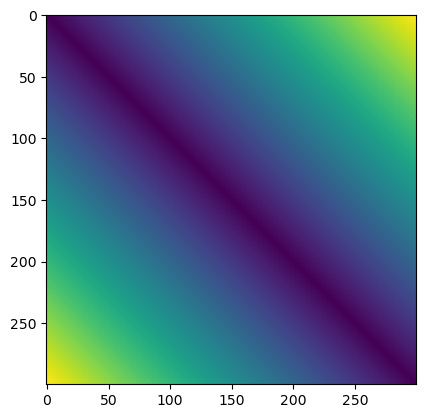

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img, interpolation='none')
plt.show()

In [32]:
objects = []
with (open("results/final/fixed_seed/rel_l_attn/ctf_0/Stored_Values/dist_batch-2.pckl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [3]:
l_dist = np.mean(objects[0], axis=0)

NameError: name 'objects' is not defined

In [ ]:
l_dist.shape

(19, 19)

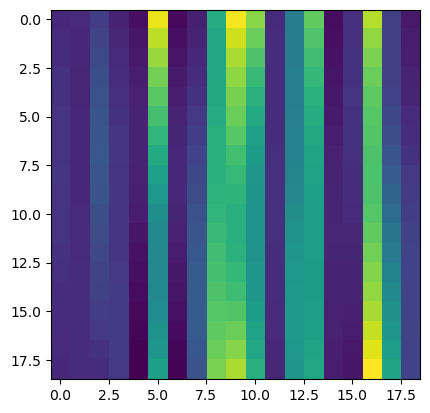

In [ ]:
plt.imshow(l_dist, interpolation='none')
plt.show()

In [14]:
class argspace:
    def __init__(self, numLabels):
            self.numLabels = numLabels
            self.load_motif_weights = True

In [15]:
import sys
import torch
import random
sys.path.insert(0,'satori')
from satori.utils import get_params_dict, annotate_motifs
#hparamfile = "modelsparam/all_exps/baseline/baseline_ld.txt"
hparamfile = "modelsparam/all_exps/baseline/baseline.txt"
params_dict = get_params_dict(hparamfile)


In [16]:
arg_space = argspace(2)

In [17]:
params_dict["CNN_filtersize"] = [21]

In [21]:

from satori.models import AttentionNet
import torch.optim as optim

device = "cpu"
net = AttentionNet(arg_space, params_dict, device=device).to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01)


{'input_channels': 4, 'use_embeddings': False, 'embd_window': 5, 'embd_size': 50, 'embd_kmersize': 3, 'num_multiheads': 4, 'singlehead_size': 64, 'multihead_size': 100, 'use_pooling': False, 'pooling_val': 4, 'readout_strategy': 'normalize', 'use_RNN': False, 'RNN_hiddensize': 100, 'use_CNN': True, 'CNN1_useexponential': False, 'use_posEnc': False, 'CNN_filters': [200], 'CNN_filtersize': [21], 'use_CNNpool': True, 'CNN_poolsize': 4, 'CNN_padding': 0, 'get_CNNout': True, 'get_seqs': True, 'get_pattn': True, 'batch_size': 256, 'num_epochs': 40, 'relativeAttn': False, 'Learnable_relativeAttn': False, 'mixed_attn': False, 'mixed_attn_config': '0.25', 'sqrt_dist': False, 'num_attnlayers': 1, 'entropy_loss': False, 'entropy_reg_value': '0.01', 'residual_connection': False}
70


In [24]:
#saved_model_dir = 'results/newdata/ctf_40pairs_eq/baseline_ld/E1/Saved_Model'
device = torch.device('cpu')

saved_model_dir = 'results/newdata/ctf_40pairs_eq/motifCNN/E3/Saved_Model'
#try:    
checkpoint = torch.load(saved_model_dir+'/model', map_location=device)
net.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
# except:
#         raise Exception(f"No pre-trained model found at {saved_model_dir}! Please run with --mode set to train.")

In [48]:
dummy_input = "CAATGTTGCACACATGTAAGGTGCATAGATATGTACCTGGACTCGGTACCGAAAAGTACCGGAATGAGGGTATTTCCTGAGGCAATTTCACATATGTTATTCCCCTGAATCGGGATTAGGTGAGCCCGGCTGCCGTTCAAAAACTCCTAAGCAAACCTAGATCCACCTGGACGTAACCATGTAAAAGTAGCGAAATAGCCCACGTGGGCATTCGGATTTCGGGGGGCGTCTCATATCGTACTATCTCGGCAGCTACGTAGGGGTCGAAGACCTTCTGACGACATGTGGTTTCCATACCAA"

def one_hot_encode(seq):
    mapping = dict(zip("ACGT", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2].T.astype(np.long)

inp = torch.tensor(one_hot_encode(dummy_input) , device="cpu")

/tmp/ipykernel_1917948/1810966958.py:6: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.eye(4)[seq2].T.astype(np.long)


In [52]:
x = inp.unsqueeze(dim=0)
x = x.to("cpu",dtype=torch.float)

In [51]:
net.eval()
net

AttentionNet(
  (layer1): Sequential(
    (0): Conv1d(4, 200, kernel_size=(21,), stride=(1,), bias=False)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout1): Dropout(p=0.2, inplace=False)
  (Q): ModuleList(
    (0): ModuleList(
      (0): Linear(in_features=200, out_features=64, bias=True)
      (1): Linear(in_features=200, out_features=64, bias=True)
      (2): Linear(in_features=200, out_features=64, bias=True)
      (3): Linear(in_features=200, out_features=64, bias=True)
    )
  )
  (K): ModuleList(
    (0): ModuleList(
      (0): Linear(in_features=200, out_features=64, bias=True)
      (1): Linear(in_features=200, out_features=64, bias=True)
      (2): Linear(in_features=200, out_features=64, bias=True)
      (3): Linear(in_features=200, out_features=64, bias=True)
    )
  )
  (V): ModuleList(
    (0): ModuleList(
      (0): L

In [56]:
l1 = net.layer1[:-1]
l1.eval()
res = l1(x)

In [61]:
torch.argmax(res[:, 19, :])

tensor(247)

In [62]:
res[:, 19, 247]

tensor([3.4566], grad_fn=<SelectBackward0>)

In [66]:
res[:, 15, torch.argmax(res[:, 15, :])]

tensor([3.1685], grad_fn=<SelectBackward0>)

In [12]:
ld_layer = net.dconv1
ld_layer.eval()

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [12]:
rd1 = net.rd1
rd1.eval()
rd2 = net.rd2
rd2.eval()

AttributeError: 'AttentionNet' object has no attribute 'rd1'

In [50]:
d_out = rd1(relative_dist)

In [39]:
d_out

tensor([[[0.3177, 0.3579, 0.3980, 0.4381, 0.4783, 0.5184, 0.5585, 0.5987,
          0.6388, 0.6789, 0.7191, 0.7592, 0.7993, 0.8395, 0.8796, 0.9197,
          0.9599, 1.0000],
         [0.3579, 0.3177, 0.3579, 0.3980, 0.4381, 0.4783, 0.5184, 0.5585,
          0.5987, 0.6388, 0.6789, 0.7191, 0.7592, 0.7993, 0.8395, 0.8796,
          0.9197, 0.9599],
         [0.3980, 0.3579, 0.3177, 0.3579, 0.3980, 0.4381, 0.4783, 0.5184,
          0.5585, 0.5987, 0.6388, 0.6789, 0.7191, 0.7592, 0.7993, 0.8395,
          0.8796, 0.9197],
         [0.4381, 0.3980, 0.3579, 0.3177, 0.3579, 0.3980, 0.4381, 0.4783,
          0.5184, 0.5585, 0.5987, 0.6388, 0.6789, 0.7191, 0.7592, 0.7993,
          0.8395, 0.8796],
         [0.4783, 0.4381, 0.3980, 0.3579, 0.3177, 0.3579, 0.3980, 0.4381,
          0.4783, 0.5184, 0.5585, 0.5987, 0.6388, 0.6789, 0.7191, 0.7592,
          0.7993, 0.8395],
         [0.5184, 0.4783, 0.4381, 0.3980, 0.3579, 0.3177, 0.3579, 0.3980,
          0.4381, 0.4783, 0.5184, 0.5585, 0.5987, 0

In [51]:
ld_layer(d_out)

tensor([[[-0.0210, -0.0299, -0.0195,  ...,  0.3320,  0.3372,  0.3201],
         [ 0.1354,  0.1785,  0.1864,  ...,  1.0139,  1.0262,  0.7797],
         [ 0.1416,  0.1741,  0.1785,  ...,  1.0016,  1.0139,  0.7699],
         ...,
         [ 0.8702,  0.9917,  0.9795,  ...,  0.1785,  0.1864,  0.1181],
         [ 0.8811,  1.0040,  0.9917,  ...,  0.1741,  0.1785,  0.1032],
         [ 0.9221,  1.3074,  1.2922,  ...,  0.2740,  0.2635,  0.1047]]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [52]:
ld_out = torch.sigmoid(ld_layer(d_out))

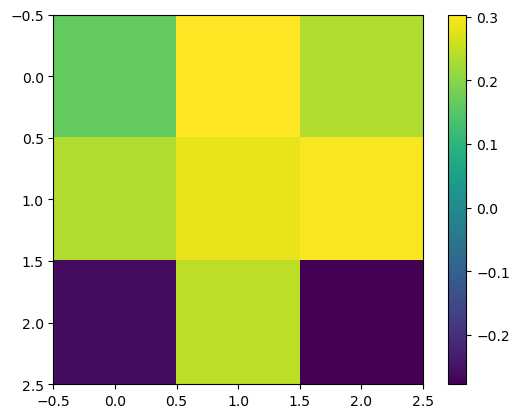

In [43]:
plt.imshow(ld_layer.weight.squeeze().cpu().detach().numpy())
plt.colorbar()

In [53]:
dist_learned = ld_out.squeeze().cpu().detach().numpy()

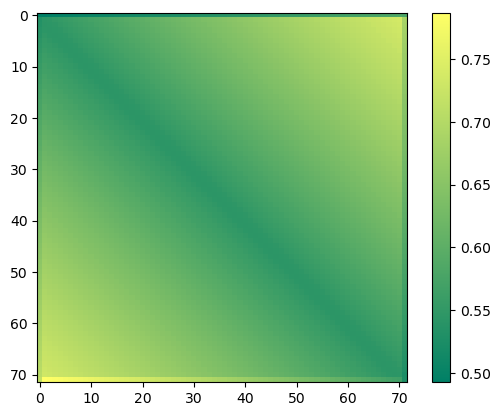

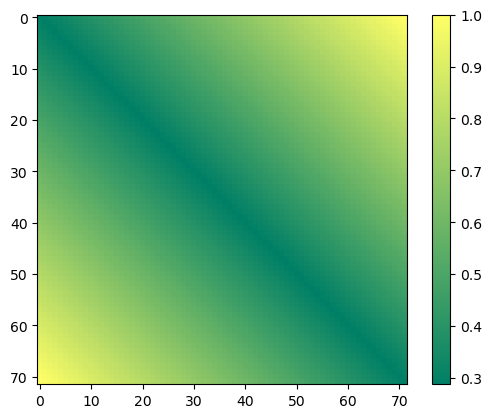

In [55]:
plt.imshow(dist_learned, cmap='summer')
plt.colorbar() 
plt.show()
plt.imshow(d_out.squeeze().cpu().detach().numpy(), cmap='summer')  # You can choose a different colormap
plt.colorbar() 

plt.show()